In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [65]:
df = pd.read_csv('df.csv')
df.set_index(df.Data, inplace=True)
df.drop('Data', inplace=True, axis=1)

In [66]:
df

,Último,Abertura,Máxima,Mínima,Vol.,Var%,ds,y
Data,,,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,136420000.0,0.94,2004-01-02,22.445
2004-01-05,23.532,22.445,23.532,22.445,496710000.0,4.84,2004-01-05,23.532
2004-01-06,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,23.576
2004-01-07,23.320,23.576,23.899,23.320,464080000.0,-1.09,2004-01-07,23.320
2004-01-08,23.717,23.334,23.718,23.122,436740000.0,1.70,2004-01-08,23.717
...,...,...,...,...,...,...,...,...
2023-08-21,114.429,115.404,115.425,114.067,9790000.0,-0.85,2023-08-21,114.429
2023-08-22,116.156,114.433,116.286,114.433,9830000.0,1.51,2023-08-22,116.156
2023-08-23,118.135,116.160,118.135,116.159,11540000.0,1.70,2023-08-23,118.135


In [67]:
def mape_error(y_true, y_pred):
    n = len(y_true)
    mape = (np.abs((y_true - y_pred) / y_true).sum() / n)
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2%}")
    return mape

def wmape_error(y_true, y_pred):
    wmape = np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()
    print(f"WMAPE (Weighted Mean Absolute Percentage Error): {wmape:.2%}")
    return wmape

def smape_error(y_true, y_pred):
    smape = (np.abs(y_pred - y_true) * 2 / (np.abs(y_pred) + np.abs(y_true))).mean()
    print(f"SMAPE (Symmetric Mean Absolute Percentage Error): {smape:.2%}")
    return smape

In [68]:
train = df.loc[df.ds < '2023-07-01']
test = df.loc[(df.ds >= '2023-07-01') & (df.ds < '2023-08-16')]
valid = df.loc[df.ds >= '2023-08-16']
train.loc[:, 'unique_id'] = 'Fechamento'
test.loc[:, 'unique_id'] = 'Fechamento'
valid.loc[:, 'unique_id']  = 'Fechamento'
train.drop(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)
test.drop(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)
h = test.index.nunique()
print(train.shape)
print(test.shape)
print(h)

(4827, 3)
(32, 3)
32


/var/folders/b6/6gbr51r91pz6skgbf3cz9lvc0000gn/T/ipykernel_46367/2436242718.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b6/6gbr51r91pz6skgbf3cz9lvc0000gn/T/ipykernel_46367/2436242718.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b6/6gbr51r91pz6skgbf3cz9lvc0000gn/T/ipykernel_46367/2436242718.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [69]:
m = Prophet()
m.add_seasonality(name='weekly', period=7, fourier_order=7)
m.fit(train)
future = m.make_future_dataframe(periods=32,freq='B')

21:56:39 - cmdstanpy - INFO - Chain [1] start processing
21:56:42 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
train.shape

(4827, 3)

In [71]:
train

,ds,y,unique_id
Data,,,
2004-01-02,2004-01-02,22.445,Fechamento
2004-01-05,2004-01-05,23.532,Fechamento
2004-01-06,2004-01-06,23.576,Fechamento
2004-01-07,2004-01-07,23.320,Fechamento
2004-01-08,2004-01-08,23.717,Fechamento
...,...,...,...
2023-06-26,2023-06-26,118.243,Fechamento
2023-06-27,2023-06-27,117.523,Fechamento
2023-06-28,2023-06-28,116.681,Fechamento


In [72]:
test.shape

(32, 3)

In [73]:
future.shape

(4859, 1)

In [74]:
future.tail(5)

,ds
4854,2023-08-09
4855,2023-08-10
4856,2023-08-11
4857,2023-08-14
4858,2023-08-15


In [75]:
test.tail(5)

,ds,y,unique_id
Data,,,
2023-08-09,2023-08-09,118.409,Fechamento
2023-08-10,2023-08-10,118.350,Fechamento
2023-08-11,2023-08-11,118.065,Fechamento
2023-08-14,2023-08-14,116.810,Fechamento
2023-08-15,2023-08-15,116.171,Fechamento


In [76]:
prophet_forecast = m.predict(future)
prophet_future=prophet_forecast.tail(32)
prophet_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
4827,2023-07-03,112.226653,104.542559,119.780313
4828,2023-07-04,112.235774,105.262638,119.329200
4829,2023-07-05,112.289061,104.877077,119.861590
4830,2023-07-06,112.318928,104.847593,119.696977
4831,2023-07-07,112.374213,104.297446,119.501956
4832,2023-07-10,112.503426,104.553517,120.554524
4833,2023-07-11,112.582943,104.747155,119.865228
4834,2023-07-12,112.701960,105.026524,120.106868
4835,2023-07-13,112.791699,104.379026,120.265464
4836,2023-07-14,112.899925,105.013857,120.941570


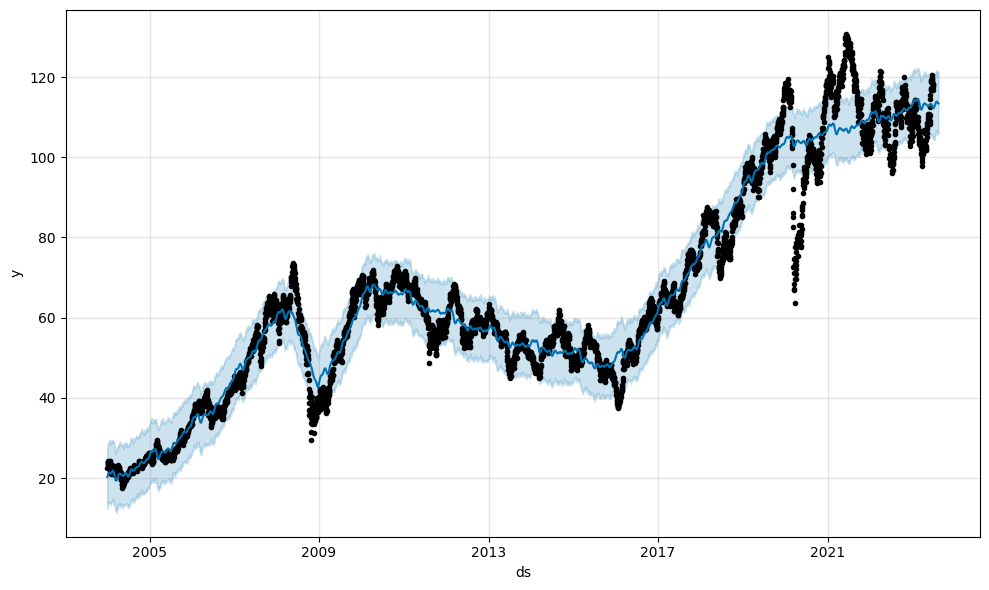

In [77]:
fig = m.plot(prophet_forecast)

In [78]:
plot_components_plotly(m, prophet_forecast)

In [79]:
model_names = ['Prophet']
mape_errors = [mape_error(test['y'].values, prophet_future['yhat'].values)]
wmape_errors = [wmape_error(test['y'].values, prophet_future['yhat'].values)]
smape_errors = [smape_error(test['y'].values, prophet_future['yhat'].values)]
df_error = pd.DataFrame({'model': model_names, 'mape': mape_errors, 'wmape': wmape_errors, 'smape': smape_errors})
df_error.to_csv('Data/ErrorsProphet.csv', index=False)

MAPE (Mean Absolute Percentage Error): 4.92%
WMAPE (Weighted Mean Absolute Percentage Error): 4.93%
SMAPE (Symmetric Mean Absolute Percentage Error): 5.05%
